Harmonic Oscillator

In [27]:
# Needed packages
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Variational Monte Carlo parameters
num_samples = 100000  # Number of Monte Carlo samples
step_size = 1.0       # Step size for Metropolis moves

In [29]:
# Compute the trial wavefunction for a given alpha
def psi_trial(x, alpha):
    return (np.sqrt(alpha) / np.pi**0.25) * np.exp(-0.5 * alpha**2 * x**2)

In [30]:
# Compute local energy of the HO for our trial wavefunction and a given alpha
def local_energy(x, alpha):
    return alpha**2 + x**2 * (1 - alpha**4)

In [31]:
# Monte Carlo sampling using the Metropolis algorithm for a given alpha
def monte_carlo_sampling(alpha, num_samples, step_size): 
    samples = []
    x = np.random.uniform(-1, 1)  # Set a random initial position

    for _ in range(num_samples):
        # Propose a new position
        x_new = x + step_size * (np.random.rand() - 0.5) #random.rand generates rdm between 0 and 1 which becomes between -0.5 and 0.5

        # Metropolis acceptance criterion
        if np.random.rand() < (psi_trial(x_new, alpha) / psi_trial(x, alpha)) ** 2: 
            x = x_new  # Accepting the move

        samples.append(x)

    return np.array(samples)

In [32]:
# Variational Monte Carlo to calculate the ground state energy and its variance for a given alpha
def variational_monte_carlo(alpha, num_samples, step_size):
    # Perform position sampling
    samples = monte_carlo_sampling(alpha, num_samples, step_size)

    # Calculate local energies for each position sample
    local_energies = np.array([local_energy(x, alpha) for x in samples])

    # Calculate mean and variance of local energies
    mean_local_energy = np.mean(local_energies)
    variance_local_energy = np.var(local_energies)  # Variance calculation

    return mean_local_energy, variance_local_energy

In [46]:
# Parameter optimization and energy minimum finding
# Define range of alpha values to scan over
alpha_values = np.linspace(0.5, 2.0, 100)  # 100 parameters of alpha are scanned
energies = []
variances = []

# Calculate mean energy and variance for each alpha trough VMC
for alpha in alpha_values:
    mean_energy, variance = variational_monte_carlo(alpha, num_samples, step_size)
    energies.append(mean_energy)
    variances.append(variance)

# Find the minimum energy and corresponding alpha
min_energy = np.min(energies)
optimal_alpha = alpha_values[np.argmin(energies)]

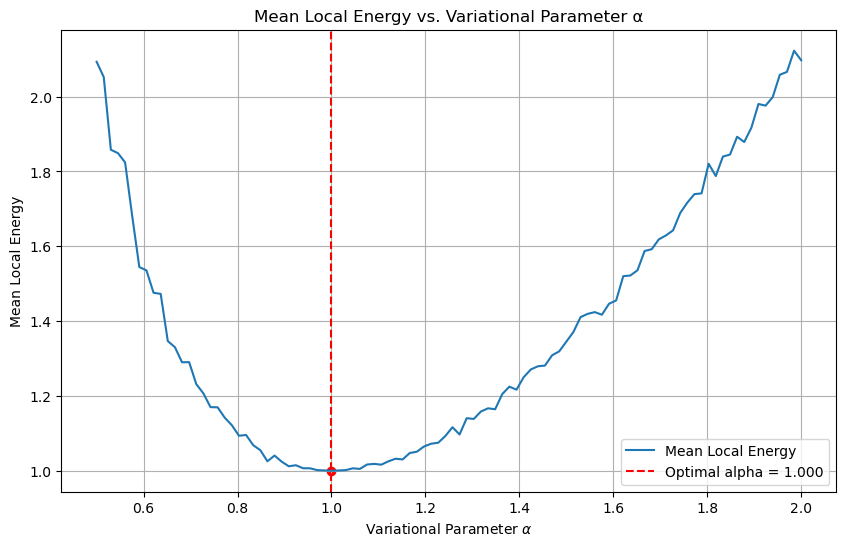

Optimal alpha: 1.0
Minimum mean local energy: 1.0


In [47]:
# Plot the energy values as a function of alpha and enhance the optimal alpha
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, energies, label="Mean Local Energy")
plt.axvline(optimal_alpha, color='r', linestyle='--', label=f"Optimal alpha = {optimal_alpha:.3f}")
plt.scatter([optimal_alpha], [min_energy], color='red')

# Labels and legend
plt.xlabel(r'Variational Parameter $\alpha$')
plt.ylabel('Mean Local Energy')
plt.title('Mean Local Energy vs. Variational Parameter α')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal alpha and minimum energy
print("Optimal alpha:", optimal_alpha)
print("Minimum mean local energy:", min_energy)